In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import RobustScaler, StandardScaler, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
%matplotlib inline

In [2]:
data = pd.read_csv(r'train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns = data.columns.str.lower()

In [4]:
data.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

In [5]:
data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
survived    891 non-null int64
pclass      891 non-null int64
age         891 non-null int16
sibsp       891 non-null int64
parch       891 non-null int64
fare        891 non-null float64
dtypes: float64(1), int16(1), int64(4)
memory usage: 36.7 KB


In [6]:
data.shape

(891, 12)

In [14]:
data.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [8]:
len(data.columns)

12

In [8]:
data.drop(['passengerid', 'name', 'sex', 'ticket', 'cabin', 'embarked'], axis = 1, inplace = True)

In [9]:
data.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [11]:
np.round(data.age.mean())

30.0

In [12]:
data['age'].fillna(np.round(data.age.mean()), inplace = True)

In [13]:
data['age'] = data['age'].astype(np.int16)

C:\Users\BOLAJI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\BOLAJI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


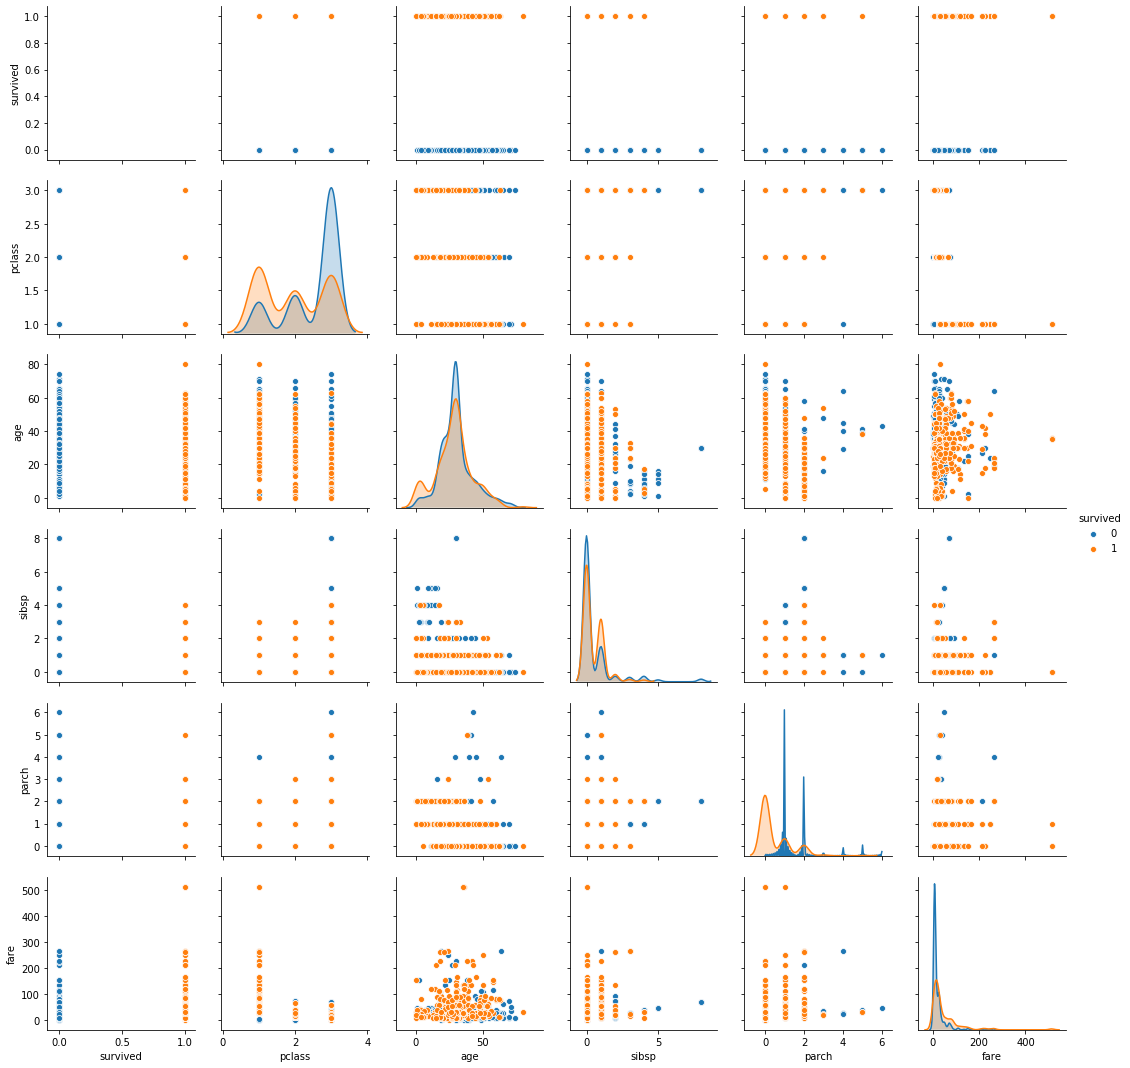

In [16]:
sns.pairplot(data = data, hue = 'survived');

In [18]:
X, y = data.iloc[:, 1:], data['survived']

In [19]:
X_val, y_val = X.values, y.values

In [20]:
sss = StratifiedShuffleSplit(n_splits = 30, test_size=0.30, random_state=45)
for train_index, test_index in sss.split(X_val, y_val):
    X_train, X_test = X_val[train_index], X_val[test_index]
    y_train, y_test = y_val[train_index], y_val[test_index]

In [25]:
def validation_score_and_variance(model, X_val, y_val, cv = 10):
    scaler = StandardScaler()
    power = PowerTransformer()
    pipe = Pipeline([('scaler', scaler)])
    X_val = pipe.fit_transform(X_val)
    score = cross_val_score(estimator=model, X = X_val, y = y_val, scoring='accuracy', cv = cv)
    return (f'the mean accuracy is: {score.mean():.2f} and the variance is {score.std():.4f}')

In [23]:
lg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors= 15)
svc = SVC()

In [26]:
for model in [lg, knn, svc]:
    print(f'for {model.__class__.__name__} {validation_score_and_variance(model= model, X_val= X_val, y_val = y_val, cv = sss)}')    

for LogisticRegression the mean accuracy is: 0.70 and the variance is 0.0251
for KNeighborsClassifier the mean accuracy is: 0.72 and the variance is 0.0186
for SVC the mean accuracy is: 0.73 and the variance is 0.0213


In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pre = model.predict(X_test)
accuracy_score(y_test, y_pre)

0.7052238805970149

In [36]:
param_grid = {'C':np.linspace(0.01, 10, 10), 'penalty':['l2', 'l1']}
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

C:\Users\BOLAJI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\BOLAJI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BOLAJI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\BOLAJI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\BOLAJI\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]),
                         'penalty': ['l2', 'l1']})

In [38]:
grid.best_estimator_

LogisticRegression(C=1.12)